In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [42]:
def train_val_test_split(X, Y):
    # check data has been read in properly
    _X_train, X_test, _Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=0)

    X_train, X_val, Y_train, Y_val = train_test_split(
        _X_train, _Y_train, test_size=0.25, random_state=0)  # 0.25 x 0.8 = 0.2
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [53]:
raw_data = pd.read_csv("../data/csvs/data.v1.1.csv")
print("Number of all rows:", len(raw_data))

data = raw_data.drop(raw_data[raw_data.sampling == 0].index).dropna().drop(
    columns=['id', 'pop', 'logpop', 'nbHF', 'adjpop', 'sampling', 'total_cases', 'elevation', 'aridity', 'irrigation'])
data.head()


Number of all rows: 2413


,longitude,latitude,adj_cases,Waccess,access,lst,pet,pop.1,urban
0,114.291939,30.567514,29.040283,-4.396702,-2.685036,-1.308296,-0.033009,3.327757,2.880330
1,114.129100,22.653890,1.331505,-1.013740,-1.744176,-0.562087,0.482712,2.969388,2.730638
2,121.455500,31.204500,0.526727,-1.423063,-2.456093,-0.873084,0.194353,3.991484,3.653661
3,110.165400,21.100030,0.309861,-0.764324,-2.039705,-0.145458,1.005834,1.906079,1.568910
4,102.873900,25.392360,2.272738,-0.246663,-0.485263,0.012917,-0.262118,0.840807,1.027507


In [44]:
# create a dataframe with all training data except the target column
X = data.drop(columns=["adj_cases"])

# create a dataframe with only the target column
Y = data[["adj_cases"]]

X_train, X_val, X_test, Y_train, Y_val, Y_test = train_val_test_split(X, Y)
X_train.head()

,longitude,latitude,Waccess,access,lst,pet,pop.1,urban
128,108.8523,31.03847,-1.029790,-1.048688,-1.094926,-0.240211,1.340388,0.791722
935,112.7700,34.73000,-1.478398,-1.467565,-0.295413,0.737672,2.773557,2.727613
227,105.0565,34.10804,-0.567336,-0.335427,0.277322,-0.470704,0.746703,0.809682
1247,121.7500,42.72000,-0.399357,-0.945488,0.063672,0.641952,0.746576,2.402087
208,118.8534,30.68815,-1.482588,-0.117957,-0.667219,-0.043913,0.860191,1.081039


In [45]:
Y_train.head()

,adj_cases
128,1.814154
935,0.000000
227,0.459729
1247,0.000000
208,0.350999


In [52]:
# Save splitted data in csv files
pd.concat([X_train, Y_train], axis=1).to_csv("../data/csvs/split/train.csv", index=True, index_label="index", na_rep="NA")
pd.concat([X_val, Y_val], axis=1).to_csv("../data/csvs/split/validation.csv", index=True, index_label="index", na_rep="NA")
pd.concat([X_test, Y_test], axis=1).to_csv("../data/csvs/split/test.csv", index=True, index_label="index", na_rep="NA")


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
china_map = gpd.read_file('../data/shapefiles/China.shp')

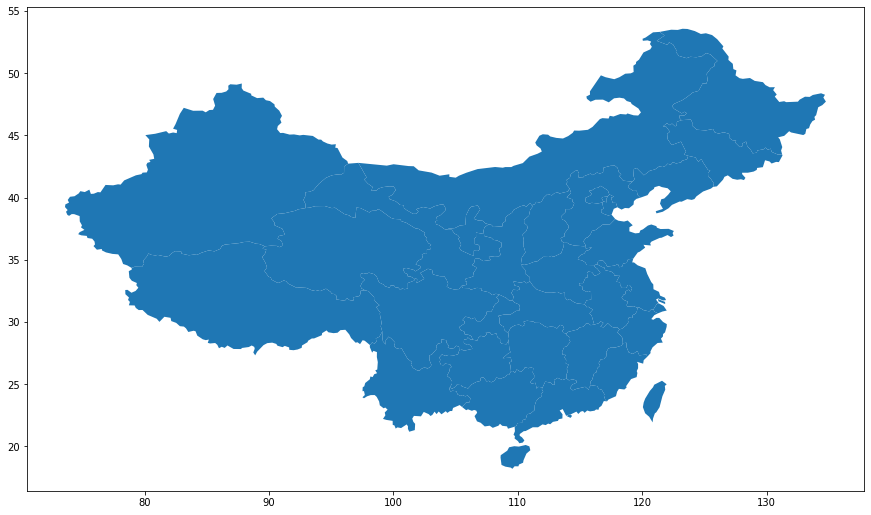

In [6]:
fig, ax = plt.subplots(figsize = (15, 15))
china_map.plot(ax = ax)